In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from model import _build_model
# from corex import Graph
from core_guide2 import _build_model

import sys 
from ruixuan.turning_scene import *
from l5kit.rasterization.rasterizer_builder import _load_metadata
import time
import pickle
import math
from collections import deque
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
from tabulate import tabulate
from utils import Gibbs_sampling, get_smoothness, get_distance_pt
from config import Config
from visualizer import plot_scene_on_grid
import itertools

In [2]:
# new a graph  
env = Graph()
sample = env.sample
# act/plan the 10 steps

# add use the history info in target to sample

# visualize the sample

/home/lab1/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator BayesianGaussianMixture from version 0.24.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [643]:
# human driving reward
import pickle
tasks = pickle.load(open("/home/lab1/repo/planning/tasks/task.pickle",'rb'))
task = tasks[0]



#accumulateed jerkiness (smoothness), propasitional stress

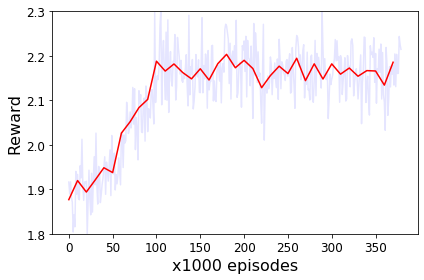

In [164]:
import matplotlib.pyplot as plt
params = {
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params)

import numpy as np
# reward_history = np.load('episode_history_collision_g2.npy', allow_pickle=True)
# reward_history = np.load('simple_model2_episode_history.npy', allow_pickle=True) 
# reward_history = np.load('simple_model_episode_history_lowc.npy', allow_pickle=True)
# reward_history = np.load('rightturn_episode_history.npy', allow_pickle=True)
# reward_history = np.load('through_episode_history.npy', allow_pickle=True)
# reward_history = np.load('through2_episode_history.npy', allow_pickle=True) 
# reward_history = np.load('guided_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided2_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided3_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided3x_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided3y_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided3a_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided3z_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided3y1_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('model4_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('model6_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('model5_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('model7_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('model8_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('model9_all_episode_history.npy', allow_pickle=True)[1000:]
# reward_history = np.load('model8a_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('model8b_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('modelx_thru_episode_history.npy', allow_pickle=True)
reward_history = np.load('modelxa_thru_episode_history.npy', allow_pickle=True)[:700000]
# reward_history = np.load('modelxb_all_episode_history.npy', allow_pickle=True)
# reward_history = np.load('modelxc_universal_episode_history.npy', allow_pickle=True)
# reward_history = np.load('modelxd_universal_episode_history.npy', allow_pickle=True)
reward_history =np.load('modelxe_universal_episode_history.npy',allow_pickle=True)[:700000]
# reward_history =np.load('modelxf_universal_episode_history.npy',allow_pickle=True)
# reward_history =np.load('modelxj_universal_episode_history.npy',allow_pickle=True)
# reward_history =np.load('modelxg_universal_episode_history.npy',allow_pickle=True)
# reward_history =np.load('modelxI_universal_episode_history.npy',allow_pickle=True)[:800000]
# reward_history =np.load('modelxII_universal_episode_history.npy',allow_pickle=True)
reward_history =np.load('modelxIII_universal_episode_history.npy',allow_pickle=True)[:400000]
# reward_history =np.load('/home/lab1/repo/planning/intergration2/modelxIII_universal_episode_history_lm.npy',\
#                         allow_pickle=True)[:400000]

# constant speed

reward_history = np.load('model_fixv_episode_history.npy', allow_pickle=True)[:380000]
reward_history =np.load('/home/lab1/repo/planning/intergration2/model_fixv_episode_history_lm.npy',\
                        allow_pickle=True)[:380000]



x=[]
step=1000
for i in range(0, len(reward_history), step):
    x.append(sum(reward_history[i:i+step])/step)
# print(x.shape)
xaxis = list(range(len(x)))
plt.plot(xaxis, x, c='b', alpha=0.1)

x=[]
step=10000
for i in range(0, len(reward_history), step):
    x.append(sum(reward_history[i:i+step])/step)
# print(x.shape)
plt.xlabel("x1000 episodes", fontsize=16)
plt.ylabel("Reward", fontsize=16)
xaxis = list(range(len(x)))
xaxis2 =[_*10 for _ in xaxis]
plt.plot(xaxis2, x, c='r')
# xx =[]
# for _ in range(len(x)):
#     xx.append(_*step)
# plt.plot(xx, x)

# plt.ylim(1.950, 2.220)
# plt.ylim(2.120, 2.400)
# plt.ylim(1.650, 2.100)
plt.ylim(1.800, 2.300)
plt.tight_layout()
# plt.savefig("modelxa_thru_history")
plt.savefig('reward_lm_constantv', dpi=100)
plt.show()

In [351]:
# import itertools
# a=list(itertools.product(np.round(np.arange(-0.1,0.15,0.05), decimals=2), np.round(np.arange(-3,4,1), decimals=0)))
# print(len(a),'\n' ,a)

In [439]:
epsilon_min = 0.1
epsilon_max = 1.0  # Maximum epsilon greedy parameter
epsilon = 1
epsilon_interval = (
    epsilon_max - epsilon_min
)
print(epsilon_interval)
i=0
while i<700000: 
    epsilon -= epsilon_interval / 1000000
    i+=1
print(epsilon)
epsilon = max(epsilon, epsilon_min)
print(epsilon , np.random.rand(1)[0])

0.9
0.37000000001272343
0.37000000001272343 0.7209946046574617


In [38]:
poolv = pickle.load(open("/home/lab1/repo/planning/saved_gibbs/8kfb_veh_pool.pickle",'rb'))
poolp = pickle.load(open("/home/lab1/repo/planning/saved_gibbs/8kfb_ped_pool.pickle",'rb'))
poolc = pickle.load(open("/home/lab1/repo/planning/saved_gibbs/8kfb_cyc_pool.pickle",'rb'))
print(poolv.keys(), poolp.keys(),poolc.keys())

dict_keys([2, 0, 1]) dict_keys([2, 1, 0]) dict_keys([2])


In [39]:
poolv = pickle.load(open("/home/lab1/repo/planning/lane_merge_gibbs/veh_traj_pool.pkl",'rb'))
poolp = pickle.load(open("/home/lab1/repo/planning/lane_merge_gibbs/ped_traj_pool.pkl",'rb'))
poolc = pickle.load(open("/home/lab1/repo/planning/lane_merge_gibbs/cyc_traj_pool.pkl",'rb'))
print(poolv.keys(), poolp.keys(),poolc.keys())

dict_keys([1, 2]) dict_keys([1, 2]) dict_keys([2])
